In [17]:
%matplotlib inline
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Starting URL for Weather Map API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude & longitude coordinates
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
# Zip together lat/long combos
lat_lngs = zip(lats, lngs)    # packs each pair of lats & lngs having the same index into a TUPLE
lat_lngs

In [4]:
# Save lat/long combos as a list
coordinates = list(lat_lngs)

In [5]:
# Create a list to hold cities we've identified
cities = []

# Identify nearest city for each lat/long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # Add city to cities list - but only if it is not already included
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

604

In [6]:
# # What's wrong with my call??
# city = cities[50]
# city_url = url + "&q=" + cities[0].replace(" ","+")
# requests.get(city_url).json()

In [7]:
# Initialize empty lists to hold weather data
city_data = []

# Print the beginning of the logging.
print('Beginning Data Retrieval          ')
print('----------------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to record count
    record_count += 1
    try:
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert date to ISO format
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append city info into city_data_list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
        
    # If an error is experienced, skip that city
    except:
        print('City not found. Skipping', city)
        pass

# Indicate that Data Loading is Complete
print('----------------------------------')
print('Data Retrieval Complete           ')
print('----------------------------------')

Beginning Data Retrieval          
----------------------------------
Processing Record 1 of Set 1 | raga
Processing Record 2 of Set 1 | faya
Processing Record 3 of Set 1 | sao paulo de olivenca
Processing Record 4 of Set 1 | amderma
City not found. Skipping amderma
Processing Record 5 of Set 1 | albert lea
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | saint-marc-des-carrieres
Processing Record 10 of Set 1 | novyy urengoy
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | bereda
Processing Record 13 of Set 1 | antofagasta
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | baglung
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | souillac
Processing Record 19 of Set 1 | zhezkazgan
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | busselton
Process

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame & set order of columns in DF.
city_data_df = pd.DataFrame(city_data)
column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[column_order]

# Export data into CSV file
output_data_file = '../Resources/weather_data/cities.csv'
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [13]:
# Extract relevant fields from DF
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

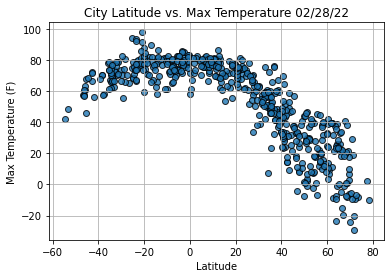

In [18]:
# Build scatterplot for latitude vs MAX TEMPERATURE
plt.scatter(lats, max_temps,
            edgecolor='k', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Formatting
plt.title(f'City Latitude vs. Max Temperature '+time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('../Analysis/Fig1.png')

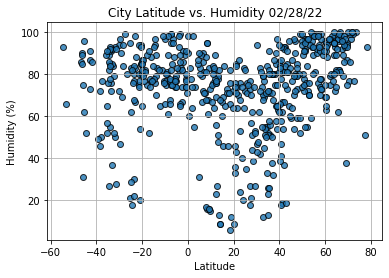

In [19]:
# Build scatterplot for latitude vs HUMIDITY
plt.scatter(lats, humidity,
            edgecolor='k', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Formatting
plt.title(f'City Latitude vs. Humidity '+time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('../Analysis/Fig2.png')

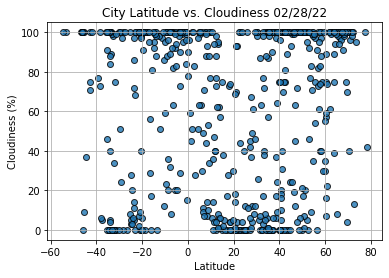

In [20]:
# Build scatterplot for latitude vs CLOUDINESS
plt.scatter(lats, cloudiness,
            edgecolor='k', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Formatting
plt.title(f'City Latitude vs. Cloudiness '+time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('../Analysis/Fig3.png')

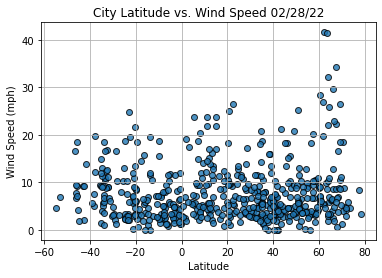

In [21]:
# Build scatterplot for latitude vs WIND SPEED
plt.scatter(lats, wind_speed,
            edgecolor='k', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Formatting
plt.title(f'City Latitude vs. Wind Speed '+time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('../Analysis/Fig4.png')